In [161]:
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
from PIL import Image
import mapper
import graphviz
from glob import glob

%matplotlib inline

In [78]:

# plt.imshow(flipped)

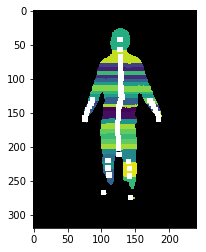

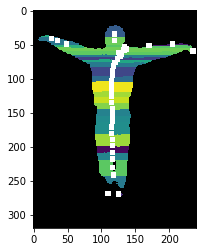

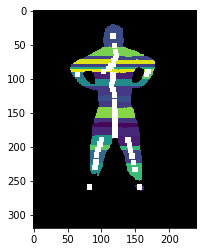

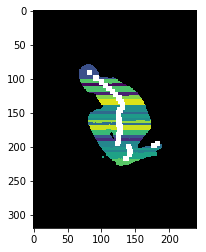

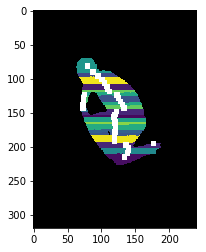

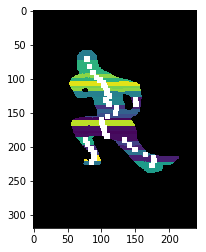

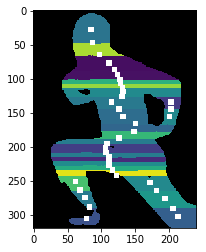

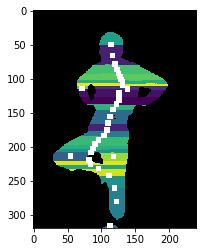

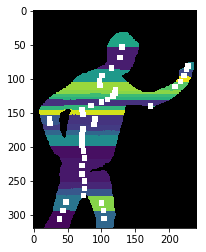

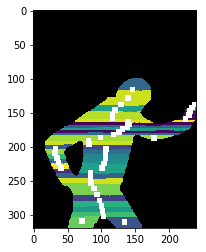

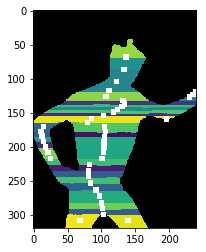

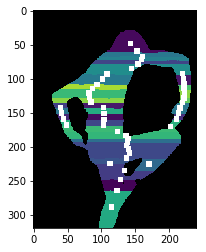

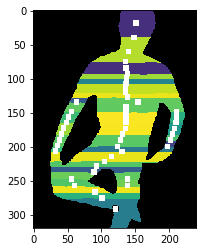

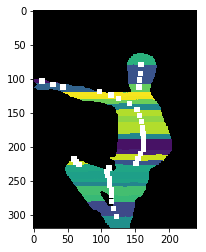

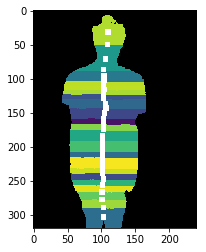

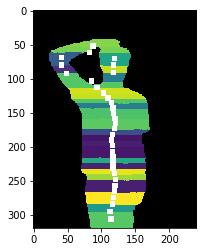

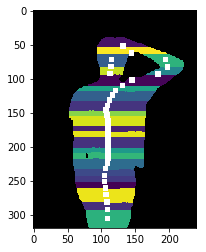

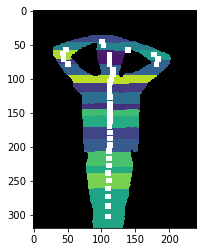

In [183]:
for file in glob("*.png"):
    i = Image.open(file)
    flipped = np.array(i).astype("uint16").byteswap()
    flipped = flipped - flipped.min()
    flipped = flipped / flipped.max()
    flipped[flipped < .20] = 0

    hot_points = np.mgrid[tuple(slice(0, x) for x in flipped.shape)].transpose(1,2,0)[flipped > .25]


    cov = mapper.cover.balanced_cover_1d(30)
    flt = hot_points[:, 0].reshape(-1, 1).astype(np.float)
    pts = hot_points.astype(np.float)

    with Capturing() as output:
        mappered = mapper.mapper(pts, flt, cov, mapper.cutoff.histogram(30))

    canvas = np.zeros((flipped.shape[0],flipped.shape[1],3), dtype=np.uint8)

    for node in mappered.nodes:
        color,  = cm.viridis(np.random.rand(1)) * 255
        for x,y in hot_points[node.points]:
            canvas[x, y, 0] = color[0]
            canvas[x, y, 1] = color[1]
            canvas[x, y, 2] = color[2]

#     g = graphviz.Graph()
#     for (a,) in mappered.simplices.simplices[0].keys():
#         g.node(str(a))

#     for ((a, b), weight) in mappered.simplices.simplices[1].items():
#         g.edge(str(a), str(b), weight=str(weight))
#     break
# g
    means = [pts[node.points].mean(axis=0) for node in mappered.nodes]


    for x, y in means:
        x = int(x)
        y = int(y)
        canvas[x-4:x+4, y-4:y+4] = 255

    plt.figure()
    plt.imshow(canvas)
#     break

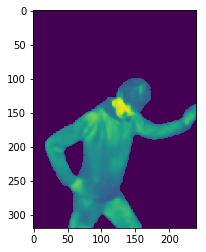

In [80]:
plt.imshow(flipped)

In [52]:
# http://stackoverflow.com/questions/16571150/how-to-capture-stdout-output-from-a-python-function-call

from io import StringIO
import sys

class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio    # free up some memory
        sys.stdout = self._stdout

In [81]:
mappered

{'info': {'size_min': 19, 'size_max': 1336, 'filter_min': 100.0, 'filter_max': 319.0, 'filter_min_array': array([ 100.]), 'filter_max_array': array([ 319.]), 'cover': {'type': 'balanced_cover_1d', 'intervals': array([30]), 'fract_overlap': array([ 0.5]), 'str': 'Balanced cover with 30 intervals and 50.0% overlap.', 'mask': None, 'dim': 1, 'min': array([ 100.]), 'max': array([ 319.]), 'range': array([ 219.])}, 'cutoff': 'Histogram method with 20 bins', 'cluster': 'Single linkage clustering'}, 'levelsets': {(0,): levelset(array([ 100.]),array([ 130.]),{2}), (1,): levelset(array([ 118.]),array([ 140.]),{3, 4}), (2,): levelset(array([ 130.]),array([ 148.]),{0, 1}), (3,): levelset(array([ 140.]),array([ 154.]),{10, 11}), (4,): levelset(array([ 148.]),array([ 160.]),{8, 12}), (5,): levelset(array([ 154.]),array([ 165.]),{5, 7}), (6,): levelset(array([ 160.]),array([ 169.]),{9}), (7,): levelset(array([ 165.]),array([ 172.]),{6}), (8,): levelset(array([ 169.]),array([ 176.]),{13}), (9,): level

In [101]:
means

[array([ 139.19051513,  129.87244481]),
 array([ 143.43362832,  233.24778761]),
 array([ 117.1002994 ,  146.89296407]),
 array([ 129.60212604,  139.74107821]),
 array([ 139.10526316,  236.26315789]),
 array([ 159.77850467,  116.71495327]),
 array([ 168.60254491,  141.21931138]),
 array([ 160.03759398,  223.9924812 ]),
 array([ 154.10159925,  116.61618062]),
 array([ 164.5755988 ,  139.58083832]),
 array([ 148.31441048,  230.98253275]),
 array([ 147.31616983,  120.50948509]),
 array([ 154.40659341,  228.76923077]),
 array([ 172.26646707,  138.13323353]),
 array([ 175.8255988 ,  131.58083832]),
 array([ 187.10329341,   99.45883234]),
 array([ 179.39221557,  126.46931138]),
 array([ 183.07335329,  118.43862275]),
 array([ 188.6 ,  177.98]),
 array([ 197.50411985,   82.90636704]),
 array([ 204.01628664,  107.65038002]),
 array([ 192.0163297 ,   81.65163297]),
 array([ 203.32850242,   33.75120773]),
 array([ 210.74112735,  106.9394572 ]),
 array([ 210.32010582,   32.96560847]),
 array([ 239

In [141]:
arr = np.array([[[1,3],[2,3],[3,3]], [[4,3],[5,3],[6,3]]])

In [142]:
arr[[(1,1), (1,2)]]

array([[5, 3],
       [6, 3]])

In [166]:
cm.viridis(1)

(0.26851000000000003, 0.0096050000000000007, 0.33542699999999998, 1.0)

0.7329159457779427

array([[  64.30947 ,   68.794665,  135.552645,  255.      ]])

In [190]:
mappered.simplices[1]

{(0, 3): 717,
 (1, 3): 466,
 (1, 8): 247,
 (1, 13): 266,
 (2, 3): 252,
 (2, 14): 204,
 (4, 12): 717,
 (4, 16): 717,
 (5, 9): 207,
 (5, 12): 225,
 (6, 10): 281,
 (6, 12): 241,
 (7, 11): 229,
 (7, 12): 252,
 (8, 10): 281,
 (9, 14): 179,
 (11, 13): 257,
 (15, 16): 718,
 (15, 20): 717,
 (17, 20): 717,
 (17, 22): 717,
 (18, 19): 717,
 (18, 23): 717,
 (19, 22): 718,
 (21, 26): 718,
 (21, 27): 717,
 (23, 26): 717,
 (24, 28): 718,
 (24, 31): 717,
 (25, 27): 717,
 (25, 28): 717,
 (29, 30): 718,
 (29, 31): 717,
 (30, 33): 717,
 (32, 33): 717,
 (32, 35): 717,
 (34, 35): 718,
 (34, 36): 717}

In [193]:
! git commit -m ""